**Równania różniczkowe - spectral bias**

In [13]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import deepxde as dde
import tensorflow.compat.v1 as tf # tensorflow==2.15.0 tensorflow-probability==0.23.0

**Zadanie 1.**

In [14]:
# Problem specific data
a = -2*np.pi
b = 2*np.pi

In [15]:
# Procedure definition
def Procedure(omega, hidden_layers, neurons_per_layer, num_training, num_test):
    # Domain
    def ode(x, y) :
        du_x = dde . grad . jacobian (y , x , i =0 , j =0)
        return du_x - tf.cos(omega*x)
    
    geom = dde.geometry.Interval(a, b)
    
    # Conditions and training data
    bc = dde.icbc.DirichletBC(geom, lambda x: 0,
                    lambda _, on_boundary: on_boundary)

    data = dde.data.PDE(
        geom,
        ode,
        bc,
        num_domain = num_training,
        num_boundary = 2,
        num_test = num_test,
    )

    # Network
    layer_size = [1] + [neurons_per_layer]*hidden_layers + [1]
    activation = "tanh"
    initializer = "Glorot normal"
    net = dde.nn.FNN(layer_size, activation, initializer)

    # Model
    model = dde.Model(data, net)
    optimizer = "adam"
    model.compile(optimizer, lr=0.001)
    losshistory, train_state = model.train(iterations=50000)

    # Results
    x_data = np.linspace(a, b, num=num_test)[:, None]

    u_pred = model.predict(x_data)
    u_true = 1/omega * np.sin(omega*x_data)
    residual = model.predict(x_data, operator=ode)

    loss = []
    for var, _ in losshistory.loss_train:
        loss.append(var)

    return x_data, u_pred, u_true, residual, loss


In [16]:
# Ansatz Procedure definition
def Procedure_Ansatz(omega, hidden_layers, neurons_per_layer, num_training, num_test):
    # Domain
    def ode(x, y) :
        du_x = dde . grad . jacobian (y , x , i =0 , j =0)
        return du_x - tf.cos(omega*x)
    
    geom = dde.geometry.Interval(a, b)
    
    # Conditions and training data
    data = dde.data.PDE(
        geom,
        ode,
        [],
        num_domain = num_training,
        num_boundary = 2,
        num_test = num_test,
    )


    # Network
    layer_size = [1] + [neurons_per_layer]*hidden_layers + [1]
    activation = "tanh"
    initializer = "Glorot normal"
    net = dde.nn.FNN(layer_size, activation, initializer)

    # Model
    model = dde.Model(data, net)
    optimizer = "adam"
    model.compile(optimizer, lr=0.001)
    losshistory, train_state = model.train(iterations=50000)

    # Results
    x_data = np.linspace(a, b, num=num_test)[:, None]

    u_pred = np.tanh(omega*x_data) * model.predict(x_data)
    u_true = 1/omega * np.sin(omega*x_data)
    residual = model.predict(x_data, operator=ode)

    return x_data, u_pred, u_true, residual, losshistory.loss_train


Compiling model...
Building feed-forward neural network...
'build' took 0.097650 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.756236 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.31e-01, 1.47e-01]    [5.30e-01, 1.47e-01]    []  
1000      [6.79e-04, 1.42e-07]    [6.67e-04, 1.42e-07]    []  
2000      [6.72e-05, 3.12e-07]    [6.11e-05, 3.12e-07]    []  
3000      [3.95e-05, 3.78e-06]    [3.52e-05, 3.78e-06]    []  
4000      [2.63e-05, 2.59e-06]    [2.30e-05, 2.59e-06]    []  
5000      [1.92e-05, 9.04e-10]    [1.65e-05, 9.04e-10]    []  
6000      [2.72e-05, 4.21e-04]    [2.54e-05, 4.21e-04]    []  
7000      [1.35e-05, 8.31e-10]    [1.16e-05, 8.31e-10]    []  
8000      [1.19e-05, 4.34e-07]    [1.03e-05, 4.34e-07]    []  
9000      [1.27e-05, 8.60e-05]    [1.13e-05, 8.60e-05]    []  
10000     [9.54e-06, 3.15e-09]    [8.15e-06, 3.15e-09]    []  
11000     [8.72e-06, 6.04e-09]    [7.42e-06, 6.04e-09]    []  
12000     [8.10e-06, 1.50e-07]    [6.93e-06, 1.50e-07]    []  
13000     [1.29e-05, 1.94e-04]    [1.19e-05, 1.94e-04]    []  
14

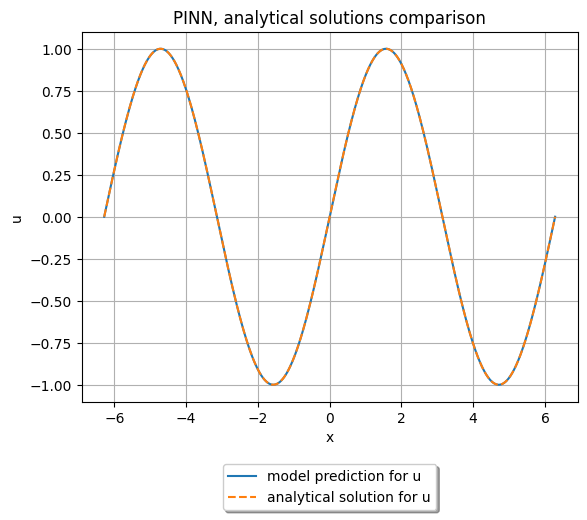

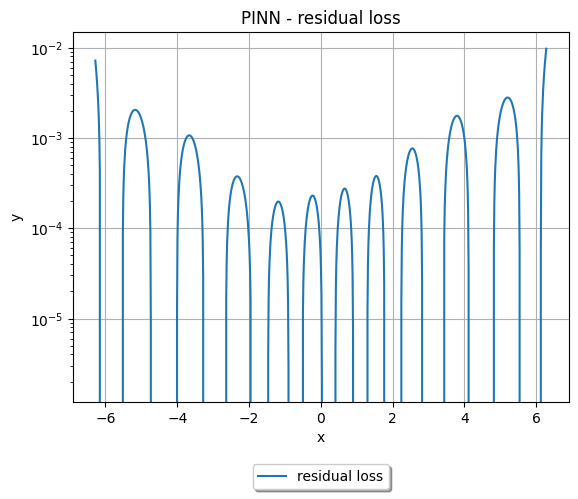

1
[0.5313589, 0.00067913806, 6.723274e-05, 3.950465e-05, 2.6317884e-05, 1.920348e-05, 2.7161394e-05, 1.3499508e-05, 1.1894756e-05, 1.2696596e-05, 9.54192e-06, 8.722225e-06, 8.103598e-06, 1.288491e-05, 7.196938e-06, 6.792456e-06, 6.45748e-06, 6.5461213e-06, 5.9366034e-06, 5.7254238e-06, 5.4965476e-06, 5.3204476e-06, 5.1181887e-06, 4.946511e-06, 4.7901017e-06, 4.6244786e-06, 4.512657e-06, 5.5856476e-06, 4.205084e-06, 4.112286e-06, 3.951148e-06, 3.8213434e-06, 3.704886e-06, 3.5942635e-06, 3.4838845e-06, 3.3813103e-06, 3.2985579e-06, 3.180583e-06, 3.0911424e-06, 3.2761727e-06, 3.9889637e-06, 2.8337506e-06, 2.75928e-06, 2.6865478e-06, 2.632933e-06, 5.115022e-06, 2.4900783e-06, 2.5021957e-06, 2.385231e-06, 5.510373e-06, 2.2557858e-06]


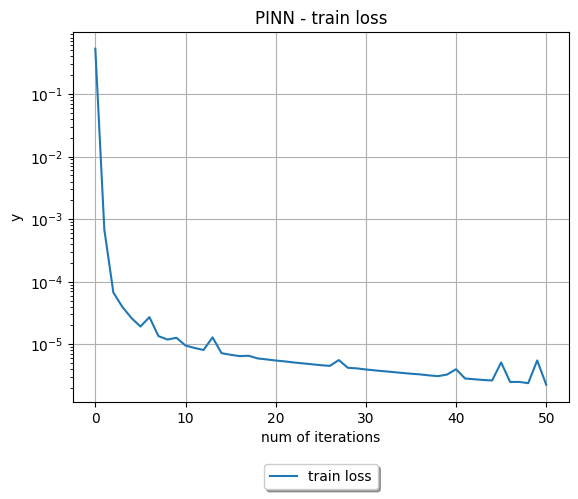

Compiling model...
Building feed-forward neural network...
'build' took 0.089252 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.497868 s

Training model...

Step      Train loss    Test loss     Test metric
0         [6.48e-01]    [6.47e-01]    []  
1000      [4.19e-04]    [3.78e-04]    []  
2000      [7.17e-05]    [6.72e-05]    []  
3000      [3.55e-05]    [3.34e-05]    []  
4000      [1.69e-05]    [1.58e-05]    []  
5000      [1.07e-05]    [1.01e-05]    []  
6000      [2.95e-06]    [2.73e-06]    []  
7000      [1.19e-06]    [1.12e-06]    []  
8000      [5.31e-07]    [5.09e-07]    []  
9000      [2.56e-07]    [2.51e-07]    []  
10000     [3.53e-07]    [3.53e-07]    []  
11000     [1.02e-07]    [9.87e-08]    []  
12000     [7.82e-08]    [7.37e-08]    []  
13000     [1.80e-07]    [1.76e-07]    []  
14000     [2.99e-06]    [2.94e-06]    []  
15000     [1.60e-07]    [1.49e-07]    []  
16000     [5.02e-08]    [4.28e-08]    []  
17000     [4.71e-08]    [3.97e-08]    []  
18000     [4.49e-08]    [3.71e-08]    []  
19000     [4.29e-08]    [3.53e-08]    []  
20000     [5.64e-08]    [5.01e-08]    []  
2

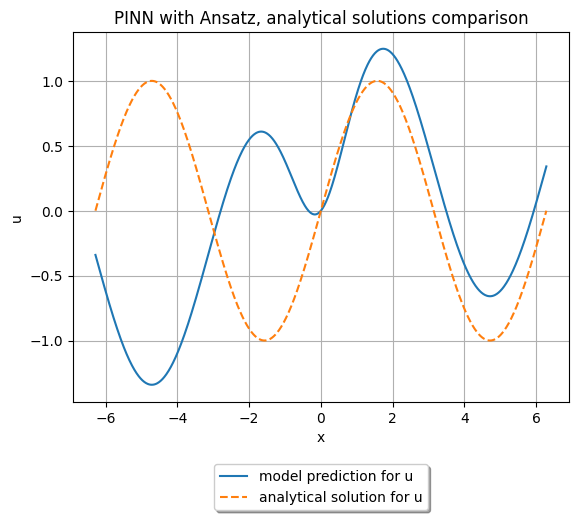

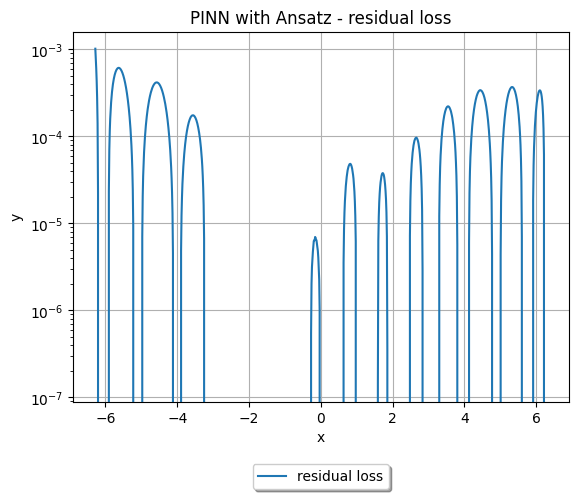

2
[array([0.6480325], dtype=float32), array([0.00041882], dtype=float32), array([7.165045e-05], dtype=float32), array([3.5503446e-05], dtype=float32), array([1.6899114e-05], dtype=float32), array([1.0652939e-05], dtype=float32), array([2.948522e-06], dtype=float32), array([1.1930467e-06], dtype=float32), array([5.310827e-07], dtype=float32), array([2.5616836e-07], dtype=float32), array([3.525153e-07], dtype=float32), array([1.0184961e-07], dtype=float32), array([7.815638e-08], dtype=float32), array([1.8021953e-07], dtype=float32), array([2.990304e-06], dtype=float32), array([1.6035494e-07], dtype=float32), array([5.0153506e-08], dtype=float32), array([4.713318e-08], dtype=float32), array([4.485907e-08], dtype=float32), array([4.2941554e-08], dtype=float32), array([5.6412457e-08], dtype=float32), array([4.0235776e-08], dtype=float32), array([7.204809e-08], dtype=float32), array([3.5893052e-07], dtype=float32), array([3.7375603e-08], dtype=float32), array([4.3341633e-08], dtype=float32),

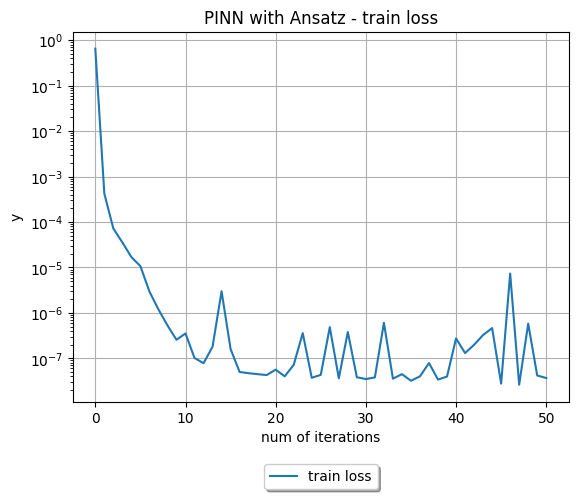

In [17]:
x_data, u_pred, u_true, residual, loss = Procedure(1.0, 2, 16, 200, 1000)

# Plot
plt.title('PINN, analytical solutions comparison')
plt.plot(x_data, u_pred, label='model prediction for u')
plt.plot(x_data, u_true, label='analytical solution for u', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('u')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

# Plot
plt.title('PINN - residual loss')
plt.plot(x_data, residual, label='residual loss')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()


print("1")
print(loss)

# Plot
plt.title('PINN - train loss')
plt.plot(range(len(loss)), loss, label='train loss')
plt.yscale('log')
plt.xlabel('num of iterations')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

x_data, u_pred, u_true, residual, loss = Procedure_Ansatz(1.0, 2, 16, 200, 1000)

# Plot
plt.title('PINN with Ansatz, analytical solutions comparison')
plt.plot(x_data, u_pred, label='model prediction for u')
plt.plot(x_data, u_true, label='analytical solution for u', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('u')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

# Plot
plt.title('PINN with Ansatz - residual loss')
plt.plot(x_data, residual, label='residual loss')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

print("2")
print(loss)

# Plot
plt.title('PINN with Ansatz - train loss')
plt.plot(range(len(loss)), loss, label='train loss')
plt.yscale('log')
plt.xlabel('num of iterations')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

Compiling model...
Building feed-forward neural network...
'build' took 0.085588 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.596586 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.26e-01, 3.91e-01]    [5.26e-01, 3.91e-01]    []  
1000      [5.00e-01, 1.38e-08]    [5.00e-01, 1.38e-08]    []  
2000      [5.00e-01, 2.44e-09]    [5.00e-01, 2.44e-09]    []  
3000      [5.00e-01, 1.21e-09]    [5.00e-01, 1.21e-09]    []  
4000      [5.00e-01, 2.94e-08]    [5.00e-01, 2.94e-08]    []  
5000      [5.00e-01, 6.74e-08]    [5.00e-01, 6.74e-08]    []  
6000      [5.00e-01, 1.50e-09]    [5.00e-01, 1.50e-09]    []  
7000      [5.00e-01, 3.32e-06]    [5.00e-01, 3.32e-06]    []  
8000      [5.00e-01, 1.31e-06]    [5.00e-01, 1.31e-06]    []  
9000      [5.00e-01, 1.02e-09]    [5.00e-01, 1.02e-09]    []  
10000     [5.00e-01, 6.23e-05]    [5.00e-01, 6.23e-05]    []  
11000     [5.00e-01, 3.20e-08]    [5.00e-01, 3.20e-08]    []  
12000     [5.00e-01, 1.84e-10]    [5.00e-01, 1.84e-10]    []  
13000     [5.00e-01, 2.47e-09]    [5.00e-01, 2.47e-09]    []  
14

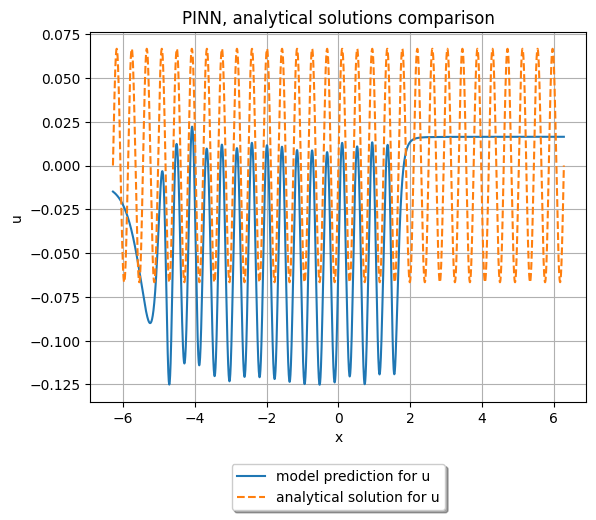

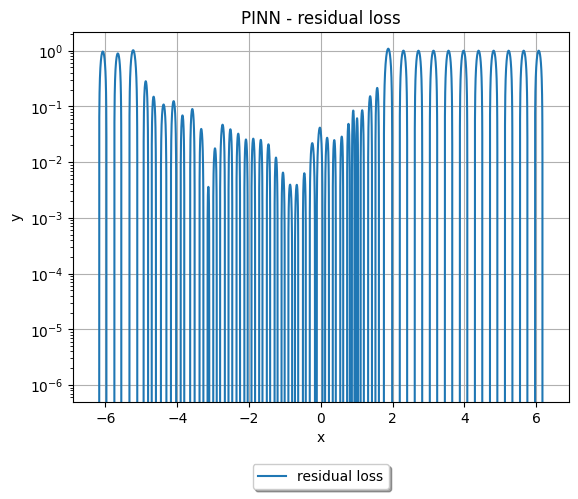

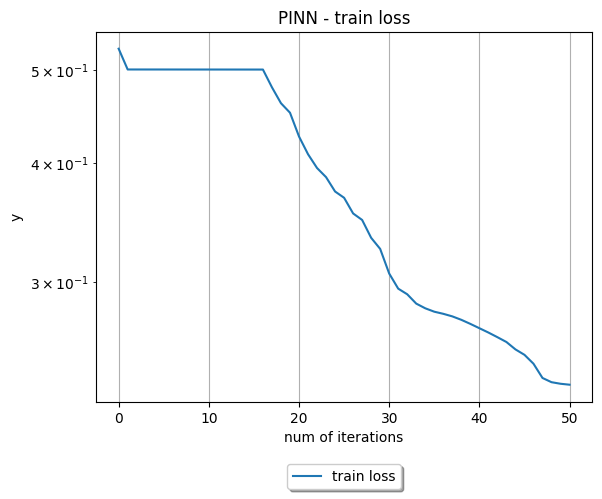

Compiling model...
Building feed-forward neural network...
'build' took 0.087479 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.533574 s

Training model...

Step      Train loss    Test loss     Test metric
0         [5.06e-01]    [5.05e-01]    []  
1000      [5.00e-01]    [5.00e-01]    []  
2000      [5.00e-01]    [5.00e-01]    []  
3000      [5.00e-01]    [5.00e-01]    []  
4000      [4.45e-01]    [4.45e-01]    []  
5000      [3.98e-01]    [3.99e-01]    []  
6000      [3.83e-01]    [3.84e-01]    []  
7000      [3.69e-01]    [3.70e-01]    []  
8000      [3.69e-01]    [3.69e-01]    []  
9000      [3.67e-01]    [3.68e-01]    []  
10000     [3.67e-01]    [3.67e-01]    []  
11000     [3.66e-01]    [3.67e-01]    []  
12000     [3.65e-01]    [3.66e-01]    []  
13000     [3.64e-01]    [3.64e-01]    []  
14000     [3.63e-01]    [3.63e-01]    []  
15000     [3.61e-01]    [3.61e-01]    []  
16000     [3.53e-01]    [3.54e-01]    []  
17000     [3.49e-01]    [3.50e-01]    []  
18000     [3.46e-01]    [3.47e-01]    []  
19000     [3.46e-01]    [3.46e-01]    []  
20000     [3.45e-01]    [3.45e-01]    []  
2

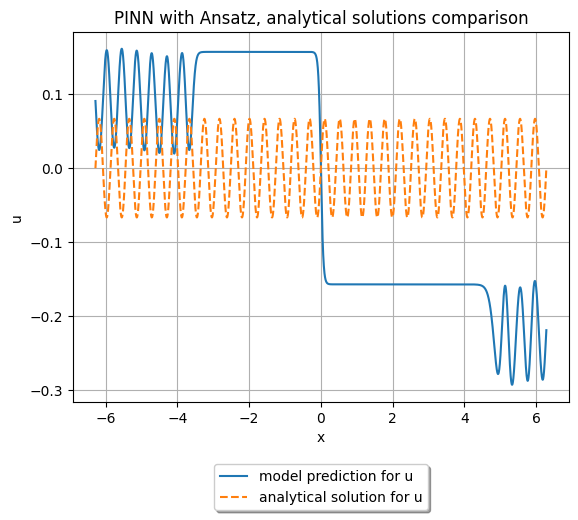

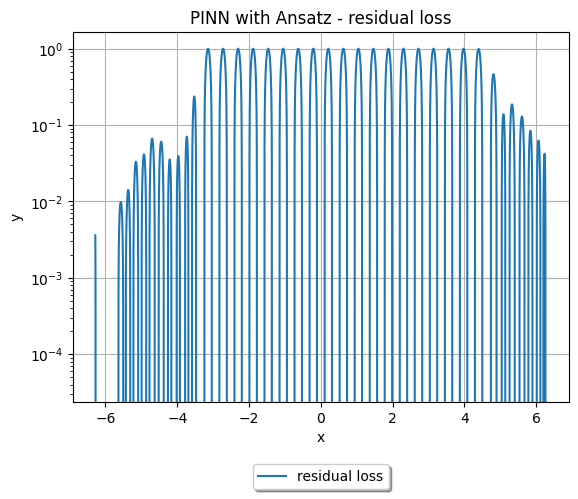

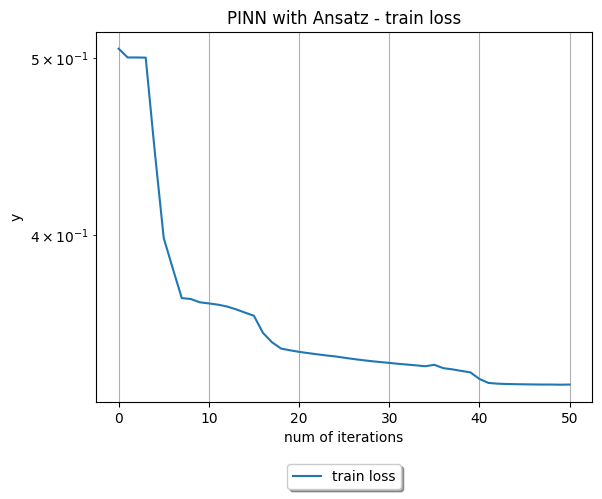

Compiling model...
Building feed-forward neural network...
'build' took 0.130852 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.834778 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.04e-01, 1.28e-01]    [5.03e-01, 1.28e-01]    []  
1000      [5.00e-01, 2.44e-10]    [5.00e-01, 2.44e-10]    []  
2000      [5.00e-01, 3.22e-04]    [5.00e-01, 3.22e-04]    []  
3000      [5.00e-01, 7.66e-09]    [5.00e-01, 7.66e-09]    []  
4000      [5.00e-01, 9.54e-11]    [5.00e-01, 9.54e-11]    []  
5000      [5.00e-01, 2.07e-06]    [5.00e-01, 2.07e-06]    []  
6000      [5.00e-01, 6.31e-08]    [5.00e-01, 6.31e-08]    []  
7000      [5.00e-01, 6.41e-10]    [5.00e-01, 6.41e-10]    []  
8000      [5.00e-01, 3.86e-11]    [5.00e-01, 3.86e-11]    []  
9000      [5.00e-01, 5.92e-08]    [5.00e-01, 5.92e-08]    []  
10000     [5.00e-01, 1.25e-10]    [5.00e-01, 1.25e-10]    []  
11000     [5.00e-01, 4.81e-08]    [4.99e-01, 4.81e-08]    []  
12000     [3.45e-01, 2.76e-07]    [3.45e-01, 2.76e-07]    []  
13000     [3.06e-01, 6.61e-08]    [3.06e-01, 6.61e-08]    []  
14

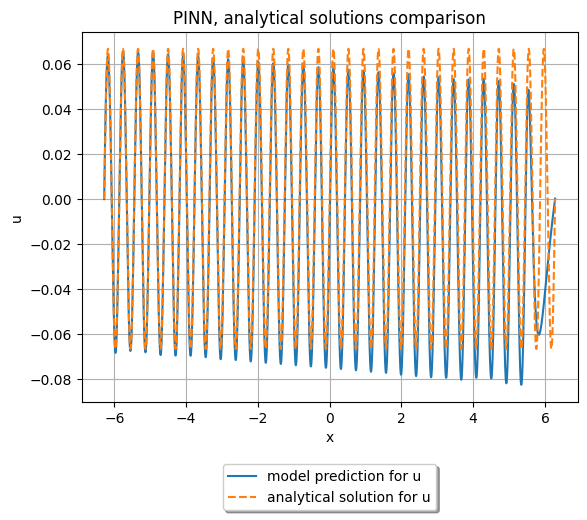

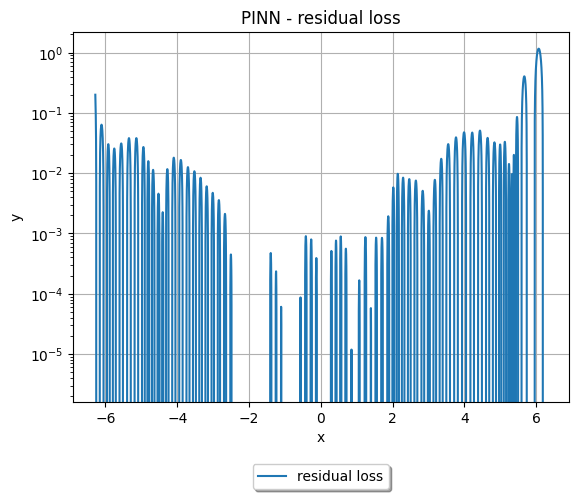

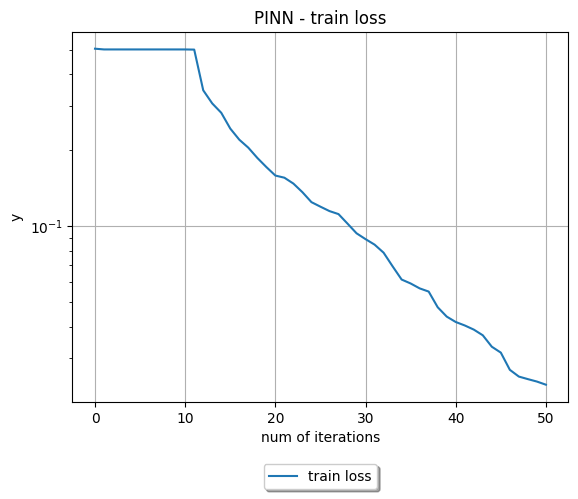

Compiling model...
Building feed-forward neural network...
'build' took 0.130828 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.801646 s

Training model...

Step      Train loss    Test loss     Test metric
0         [5.05e-01]    [5.05e-01]    []  
1000      [5.00e-01]    [5.00e-01]    []  
2000      [3.35e-01]    [3.35e-01]    []  
3000      [2.43e-01]    [2.42e-01]    []  
4000      [1.92e-01]    [1.91e-01]    []  
5000      [1.66e-01]    [1.65e-01]    []  
6000      [1.36e-01]    [1.35e-01]    []  
7000      [1.17e-01]    [1.17e-01]    []  
8000      [1.01e-01]    [1.01e-01]    []  
9000      [8.19e-02]    [8.19e-02]    []  
10000     [6.66e-02]    [6.67e-02]    []  
11000     [4.83e-02]    [4.84e-02]    []  
12000     [4.72e-02]    [4.73e-02]    []  
13000     [3.55e-02]    [3.53e-02]    []  
14000     [2.70e-02]    [2.73e-02]    []  
15000     [2.66e-02]    [2.69e-02]    []  
16000     [2.49e-02]    [2.52e-02]    []  
17000     [2.08e-02]    [2.10e-02]    []  
18000     [2.00e-02]    [2.02e-02]    []  
19000     [1.94e-02]    [1.97e-02]    []  
20000     [1.91e-02]    [1.93e-02]    []  
2

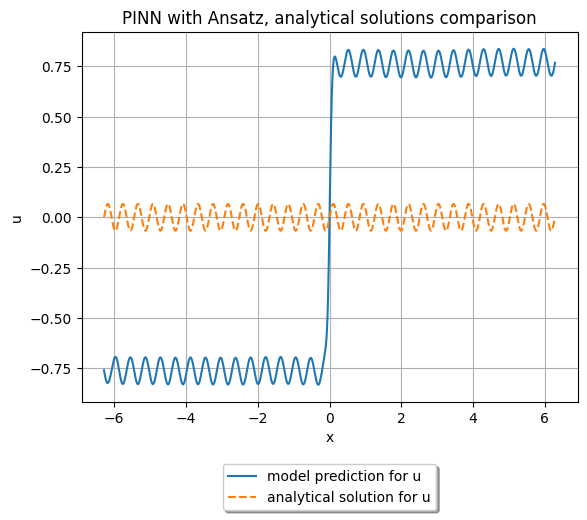

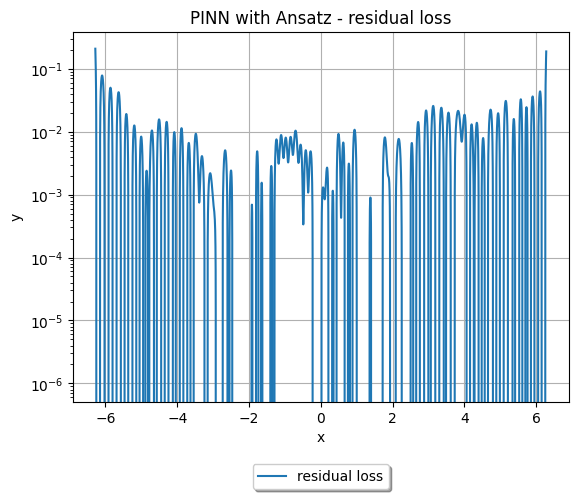

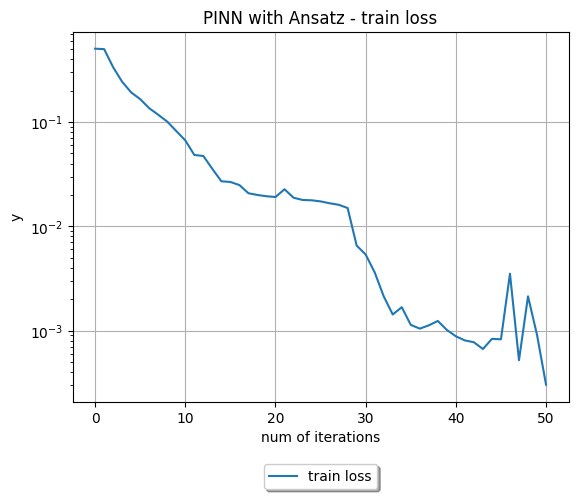

Compiling model...
Building feed-forward neural network...
'build' took 0.159456 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.005721 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.08e-01, 1.93e-01]    [5.08e-01, 1.93e-01]    []  
1000      [5.00e-01, 1.43e-10]    [5.00e-01, 1.43e-10]    []  
2000      [5.00e-01, 1.32e-06]    [5.00e-01, 1.32e-06]    []  


KeyboardInterrupt: 

In [18]:
for layers, neurons in [(2, 16), (4, 64), (5, 128)]:  
        x_data, u_pred, u_true, residual, loss = Procedure(15.0, layers, neurons, 200*15, 5000)

        # Plot
        plt.title('PINN, analytical solutions comparison')
        plt.plot(x_data, u_pred, label='model prediction for u')
        plt.plot(x_data, u_true, label='analytical solution for u', linestyle='dashed')
        plt.xlabel('x')
        plt.ylabel('u')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
                fancybox=True, shadow=True, ncol=1)
        plt.grid()
        plt.show()

        # Plot
        plt.title('PINN - residual loss')
        plt.plot(x_data, residual, label='residual loss')
        plt.yscale('log')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
                fancybox=True, shadow=True, ncol=1)
        plt.grid()
        plt.show()

        # Plot
        plt.title('PINN - train loss')
        plt.plot(range(len(loss)), loss, label='train loss')
        plt.yscale('log')
        plt.xlabel('num of iterations')
        plt.ylabel('y')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
                fancybox=True, shadow=True, ncol=1)
        plt.grid()
        plt.show()

        x_data, u_pred, u_true, residual, loss = Procedure_Ansatz(15.0, layers, neurons, 200*15, 5000)

        # Plot
        plt.title('PINN with Ansatz, analytical solutions comparison')
        plt.plot(x_data, u_pred, label='model prediction for u')
        plt.plot(x_data, u_true, label='analytical solution for u', linestyle='dashed')
        plt.xlabel('x')
        plt.ylabel('u')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
                fancybox=True, shadow=True, ncol=1)
        plt.grid()
        plt.show()

        # Plot
        plt.title('PINN with Ansatz - residual loss')
        plt.plot(x_data, residual, label='residual loss')
        plt.yscale('log')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
                fancybox=True, shadow=True, ncol=1)
        plt.grid()
        plt.show()

        # Plot
        plt.title('PINN with Ansatz - train loss')
        plt.plot(range(len(loss)), loss, label='train loss')
        plt.yscale('log')
        plt.xlabel('num of iterations')
        plt.ylabel('y')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
                fancybox=True, shadow=True, ncol=1)
        plt.grid()
        plt.show()